<a href="https://colab.research.google.com/github/snajme/FinTechML/blob/main/NominalandRealFedFundsRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier

np.set_printoptions(linewidth=195, edgeitems=5)


In [9]:
result_list = []

data = pd.read_csv('Nominal and Real Fed Funds Rate.csv')

data.head()

,DATE,DFF,CPIAUCSL,Real Fed Funds,USRECM
0,01/06/1954,NaN,NaN,NaN,NaN
1,01/07/1954,0.80,0.26129,0.53871,1.0
2,01/08/1954,1.22,0.00000,1.22000,1.0
3,01/09/1954,1.07,-0.29751,1.36751,1.0
4,01/10/1954,0.85,-0.85343,1.70343,1.0


TypeError: Axes.scatter() missing 1 required positional argument: 'y'

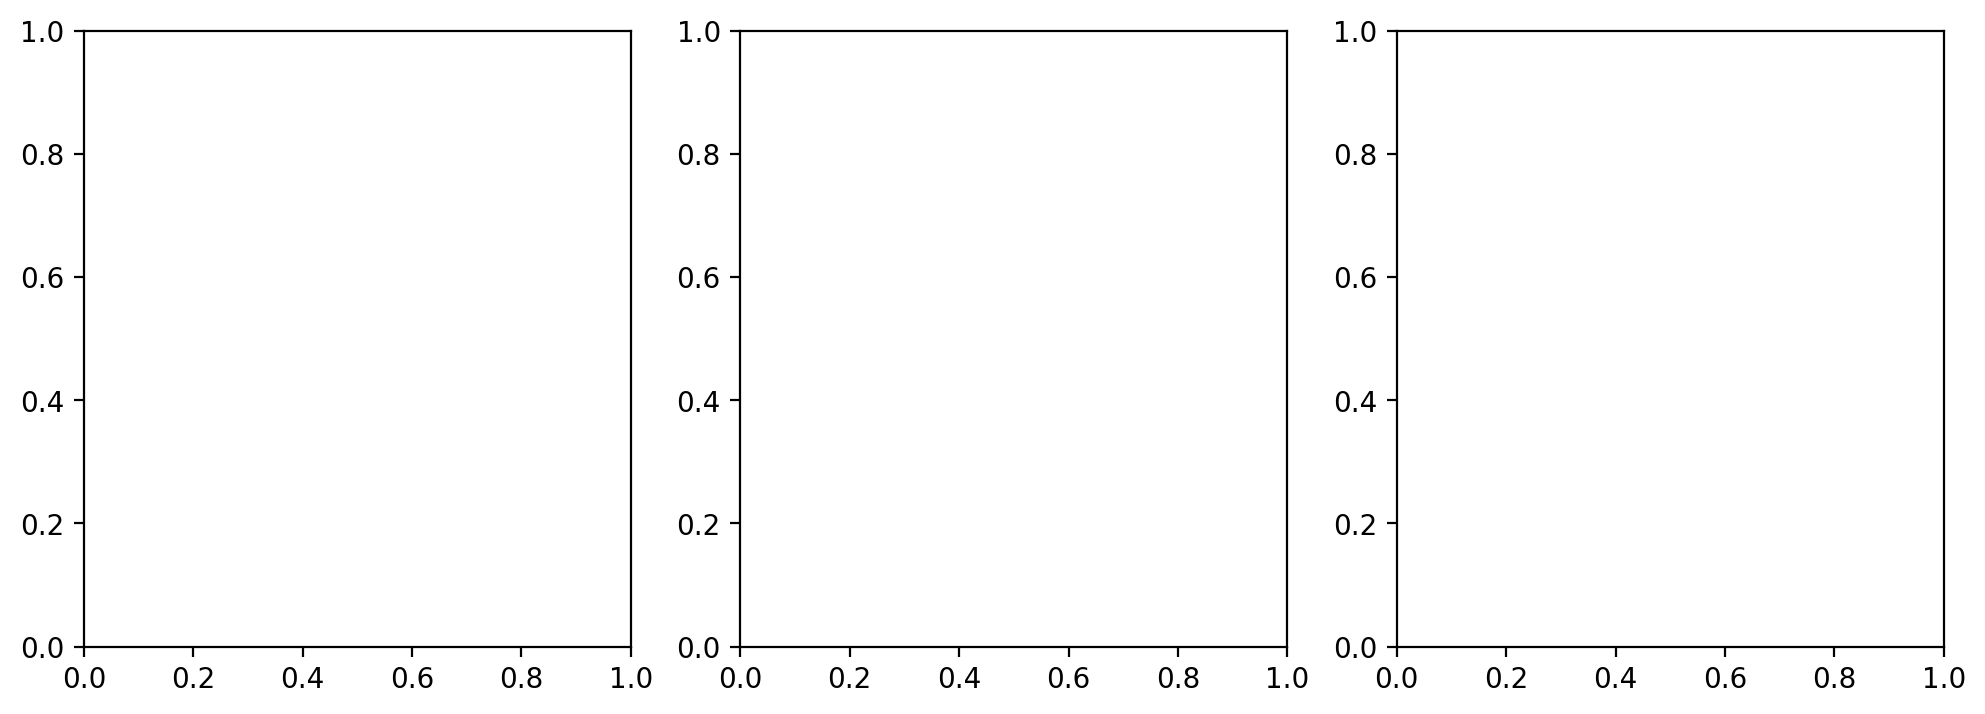